<a href="https://colab.research.google.com/github/RovilSurioJr/Numerical-Methods/blob/master/Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mulitple Linear Regression

In [20]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
db_dataset = datasets.load_diabetes()
db = pd.DataFrame(db_dataset.data, columns=db_dataset.feature_names)
#db.describe()
#print(db_dataset.DESCR)

In [9]:
Y = db_dataset.target # Y is the target data provided or the quantitative measure of disease progression one year after baseline

### Problem

Determine the percentage of how bp, bmi, s1 (total serum cholesterol), s2 (low-density lipoproteins), s3 (high-density lipoproteins), s5 (possibly log of serum triglycerides level), and s6 (sugar level) of the patient could explain the values of the disease progression one year after baseline.


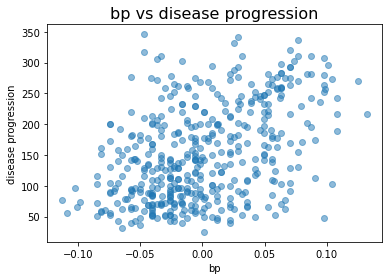

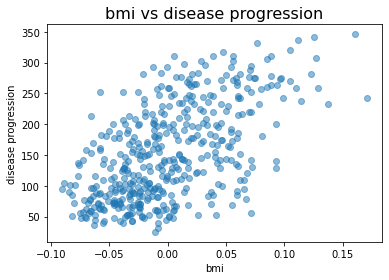

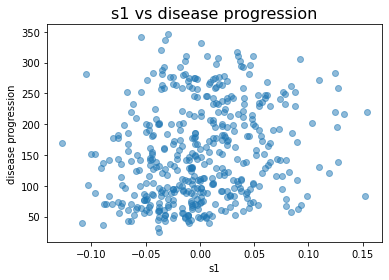

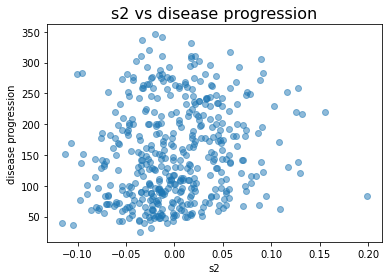

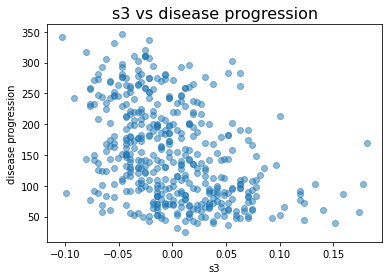

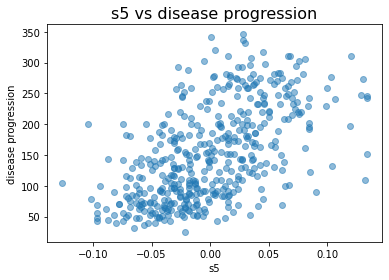

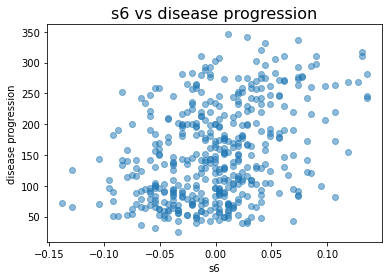

In [10]:
plt.scatter(x=db['bp'],y=Y,alpha=0.5)
plt.title('bp vs disease progression', fontsize=16) 
plt.xlabel('bp')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['bmi'],y=Y,alpha=0.5)
plt.title('bmi vs disease progression', fontsize=16) 
plt.xlabel('bmi')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s1'],y=Y,alpha=0.5)
plt.title('s1 vs disease progression', fontsize=16) 
plt.xlabel('s1')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s2'],y=Y,alpha=0.5)
plt.title('s2 vs disease progression', fontsize=16) 
plt.xlabel('s2')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s3'],y=Y,alpha=0.5)
plt.title('s3 vs disease progression', fontsize=16) 
plt.xlabel('s3')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s5'],y=Y,alpha=0.5)
plt.title('s5 vs disease progression', fontsize=16) 
plt.xlabel('s5')  
plt.ylabel('disease progression') 
plt.show()

plt.scatter(x=db['s6'],y=Y,alpha=0.5)
plt.title('s6 vs disease progression', fontsize=16) 
plt.xlabel('s6')  
plt.ylabel('disease progression') 
plt.show()



In [11]:
X = pd.DataFrame(np.c_[db['bp'], db['bmi'],db['s1'],db['s2'],db['s3'],db['s5'],db['s6']], columns=['bp','bmi','s1','s2','s3','s5','s6']) #44
y = db_dataset.target


In [12]:
# We are using 80% of the data to build the training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 

In [13]:
model = LinearRegression() #Defining linear regression model
model.fit(X_train, y_train) #Building training model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model_summary = pd.DataFrame(X.columns, columns=['Features'])
model_summary['Weights Raw'] = model.coef_.reshape(7,1) # Coefficient of each Feaatures
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,bp,257.263621
1,bmi,571.247689
2,s1,-418.441079
3,s2,244.219515
4,s3,-60.092176
5,s5,653.838811
6,s6,36.123088
7,Intercept,151.720847


In [15]:
preds = model.predict(X_test) # applying trained model to make prediction using test set
out = pd.DataFrame({'Actual': y_test, 'Predicted': preds})

Text(0, 0.5, 'Prediction')

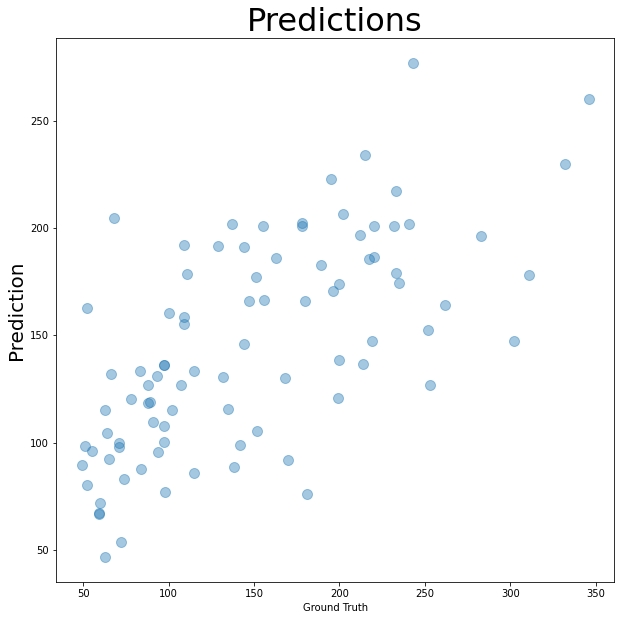

In [16]:
plt.figure(figsize=(10,10))
plt.title('Predictions', fontsize=32)
plt.scatter(y_test, preds, s = 100,  alpha=0.4)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction', fontsize=20)

In [17]:
def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [18]:
MSE = metrics.mean_squared_error(y_test, preds)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, preds)
AR2 = adjr2(R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Multiple Regression'] = MSE, RMSE, R2, AR2
model_metrics

,Metrics,Multiple Regression
0,MSE,2961.761365
1,RMSE,54.422067
2,R^2,0.444215
3,Adjusted R^2,0.432938


The correlation between the bp, bmi, s1 (total serum cholesterol), s2 (low-density lipoproteins), s3 (high-density lipoproteins), s5 (possibly log of serum triglycerides level), and s6 (sugar level) was shown above. It can be concluded that quantitative measure of disease progression one year after baseline was affected only to a certain degree of the bp, bmi, s1, s2, s3, s5, and s6 of the patient which is proven by relatively small R^2 which is 0.44. Therefore, bp, bmi, s1, s2, s3, s5, and s6 could explain the measure of disease progression values by only 44%

### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
def adjr2(r2,x):
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
X = pd.DataFrame(np.c_[db['bp'], db['bmi'],db['s1'],db['s2'],db['s3'],db['s5'],db['s6']], columns=['bp','bmi','s1','s2','s3','s5','s6']) 
y = db_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [26]:
quad_features = PolynomialFeatures(degree=2)
x_quad = quad_features.fit_transform(X_train)

In [27]:
model = LinearRegression()
model.fit(x_quad,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
preds = model.predict(quad_features.fit_transform(X_test))

In [29]:
poly_MSE = metrics.mean_squared_error(y_test,preds)
poly_RMSE = np.sqrt(poly_MSE)
poly_R2 = metrics.r2_score(y_test,preds)
poly_AR2 = adjr2(poly_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Polynomial Regression'] = poly_MSE, poly_RMSE, poly_R2, poly_AR2
model_metrics

,Metrics,Polynomial Regression
0,MSE,3908.263071
1,RMSE,62.516102
2,R^2,0.266601
3,Adjusted R^2,0.251720


### Linear Regression using Normal Equation

$$\theta = (X^TX)^{-1}X^Ty \\ _{\text{(Normal Equation)}}$$

In [31]:
X = pd.DataFrame(np.c_[db['bp'], db['bmi'],db['s1'],db['s2'],db['s3'],db['s5'],db['s6']], columns=['bp','bmi','s1','s2','s3','s5','s6']) #44
y = db_dataset.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 

In [34]:
X=X_train
y=y_train     


ones = np.ones((X.shape[0], 1)) # Appending a column of ones in X to add the bias term.
X = np.concatenate((ones, X), axis=1)
XTX = np.dot(X.T,X)
XTX_inv = np.linalg.inv(XTX)
XTy = ((X.T).dot(y))
inter_weights = np.dot(XTX_inv,XTy)
intercept = inter_weights[0]
print("The intercept is:",intercept)
weights = inter_weights[1:8]
print("The weights are:",weights)


The intercept is: 151.720847207792
The weights are: [ 257.2636207   571.24768867 -418.44107877  244.21951477  -60.09217567
  653.83881075   36.12308838]


In [35]:
ones = np.ones((X_test.shape[0], 1))# Appending a column of ones in X to add the bias term.
X = np.concatenate((ones, X_test), axis=1)
preds = np.dot(X,inter_weights)

In [36]:
normal_MSE = metrics.mean_squared_error(y_test, preds)
normal_RMSE = np.sqrt(normal_MSE)
normal_R2 = metrics.r2_score(y_test, preds)
normal_AR2 = adjr2(normal_R2,X_train)
model_metrics = pd.DataFrame([['MSE'],['RMSE'],['R^2'],
                              ['Adjusted R^2']], 
                             columns=['Metrics'])
model_metrics['Normal Equation'] = normal_MSE, normal_RMSE, normal_R2, normal_AR2
model_metrics

,Metrics,Normal Equation
0,MSE,2961.761365
1,RMSE,54.422067
2,R^2,0.444215
3,Adjusted R^2,0.432938
